# Initial Data Processing

In [1]:
# pip install pandas matplotlib numpy

In [43]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating Data Pipeline

In [123]:
import tensorflow as tf
from tensorflow import keras

In [4]:
# tf.keras.utils.image_dataset_from_directory??

In [124]:
BATCH_SIZE = 32

In [125]:
cats = tf.keras.utils.image_dataset_from_directory(
    'pet_images/cat_breeds', #change to cat_breeds if doing cats
    image_size=(256, 256),
    label_mode='int'
)

Found 721 files belonging to 12 classes.


In [126]:
cats = cats.map(lambda x, y: (x/255.0, y))

In [127]:
train_size = int(len(cats)*.7)
val_size = int(len(cats)*.2)
test_size = int(len(cats)*.1)

In [128]:
train = cats.take(train_size)
val = cats.skip(train_size).take(val_size)
test = cats.skip(train_size + val_size).take(test_size)

# Deep Learning

In [131]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# build a sequential model
model = Sequential()
model.add(InputLayer(shape=(256, 256, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# Flatten before passing to Dense layer
model.add(Flatten())

# Add a Dense layer that matches the output shape
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=12, activation='softmax'))  # Adjust this based on your number of classes (e.g., 12 for cats)

# compile model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer="adam", 
              metrics=['accuracy'])

# fit on data for 30 epochs
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 492ms/step - accuracy: 0.1249 - loss: 2.7682 - val_accuracy: 0.0625 - val_loss: 2.6354
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 476ms/step - accuracy: 0.2676 - loss: 2.1738 - val_accuracy: 0.1016 - val_loss: 2.4436
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 486ms/step - accuracy: 0.4089 - loss: 1.8336 - val_accuracy: 0.1094 - val_loss: 2.4385
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 475ms/step - accuracy: 0.4962 - loss: 1.5251 - val_accuracy: 0.1328 - val_loss: 2.4698
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 490ms/step - accuracy: 0.6378 - loss: 1.1076 - val_accuracy: 0.1484 - val_loss: 2.5211
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 464ms/step - accuracy: 0.7299 - loss: 0.8309 - val_accuracy: 0.1719 - val_loss: 2.5249


# Train

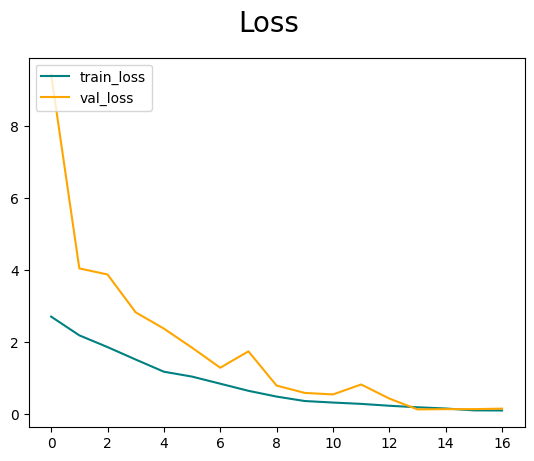

In [122]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='train_loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

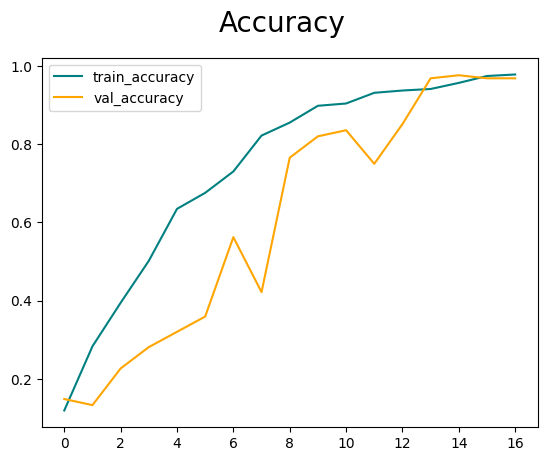

In [93]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='train_accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate Performance

In [94]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [95]:
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat_classes = np.argmax(yhat, axis=1)
    
    y_true.extend(y)
    y_pred.extend(yhat_classes)

print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("Accuracy:", accuracy_score(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Precision (macro): 0.9621693121693123
Recall (macro): 0.9692760942760943
Accuracy: 0.953125


In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3]])

# Test on new data

In [96]:
import cv2

### Cleaning

In [103]:
def classify(classes):
    max_elem, val = 0, classes[0]
    for i in range(1,len(classes)):
        if classes[i] > val:
            max_elem, val = i, classes[i]
    print(classes)
    return max_elem

In [98]:
def convert_to_cat_breeds(num):
    breeds = [
        "abyssinian", "bengal", "birman", "bombay",
        "british_shorthair", "egyptian_mau", "main_coon", "persian",
        "ragdoll", "russian_blue", "siamese", "sphynx"
    ]
    
    if 0 <= num < len(breeds):
        return breeds[num]
    else:
        return "Unknown"

In [99]:
def convert_to_dog_breeds(num):
    breeds = [
        "american_bulldog", "american_pit_bull_terrier", "basset_hound", "beagle",
        "boxer", "chihuahua", "english_cocker_spaniel", "english_setter",
        "german_shorthaired", "great_pyrenees", "havanese", "jananese_chin",
        "keeshond", "leonberger", "miniature_pinscher", "newfoundland",
        "pomeranian", "pug", "saint_brenard", "samoyed", "scottish_terrier",
        "shiba_inu", "staffordshire_bull_terrier", "wheaten_terrier", 
        "yorkshire_terrier",
    ]
    
    if 0 <= num < len(breeds):
        return breeds[num]
    else:
        return "Unknown"

In [100]:
def run_test(img):
    img = cv2.imread(img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    resize = tf.image.resize(img, (256, 256))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    yhat = model.predict(np.expand_dims(resize/255,0))
    print(convert_to_cat_breeds(classify(yhat[0])))

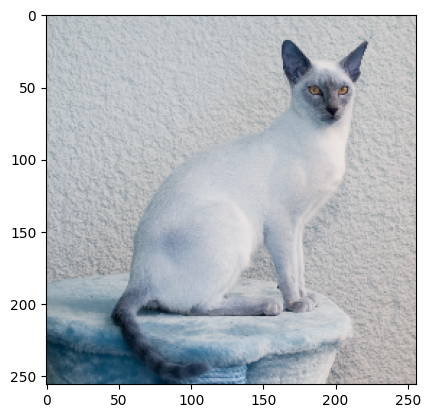

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[6.4143002e-01 1.1695102e-04 4.6072870e-05 3.3305365e-01 1.9799601e-03
 8.5822055e-03 8.0922776e-04 1.9583444e-03 3.2706033e-05 9.4749667e-03
 2.3466896e-03 1.6913343e-04]
abyssinian


In [120]:
run_test('siamese_test.jpg')